# 206. 反转链表

给你单链表的头节点 head ，请你反转链表，并返回反转后的链表。
 

示例 1：

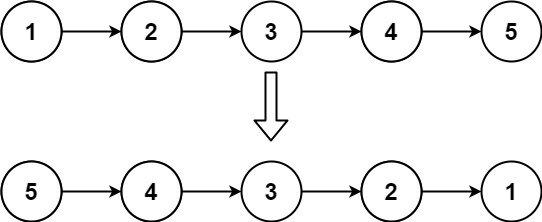

输入：head = [1,2,3,4,5]
输出：[5,4,3,2,1]  

示例 2：

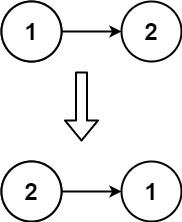

输入：head = [1,2]
输出：[2,1]
示例 3：

输入：head = []
输出：[]
 

提示：

链表中节点的数目范围是 [0, 5000]
-5000 <= Node.val <= 5000
 

进阶：链表可以选用迭代或递归方式完成反转。你能否用两种方法解决这道题？

In [1]:
# 迭代法
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def f206_1(head):
    pre, cur = None, head
    while cur :
        nxt = cur.next
        cur.next = pre
        pre, cur = cur, nxt
    return pre 

# head = [1,2,3,4,5] 这是一个列表list而非listnode的链表，需要修正测试用例
         

In [20]:
# 递归法
def f206_2(head):
    # 递归函数，用来反转当前节点cur，并且将其上一个节点指定为pre
    def reverse(cur, pre):
        if not cur:
            # 当前节点为空时，意味着我们已经处理完整个链表，
            # pre就是新的头结点
            return pre
        # 记录下一个节点
        next = cur.next
        # 将当前节点的next指向前一个节点
        cur.next = pre
        # 用当前节点和下一个节点调用递归
        return reverse(next, cur)

    # 调用递归函数，初始时前一个节点为None
    return reverse(head, None)

In [16]:
# 1. 不借助任何辅助函数，直接构建
node5 = ListNode(5)
node4 = ListNode(4, node5)
node3 = ListNode(3, node4)
node2 = ListNode(2, node3)
head = ListNode(1, node2)

reversed_head = f206_1(head)

current = reversed_head
while current:
    print(current.val, end = ' ->')
    current = current.next

print('None')

5 ->4 ->3 ->2 ->1 ->None


In [6]:
# 2. 函数创建一个链表
# 辅助函数：将列表转换为链表
def list_listnode(vals):
    dummy = cur = ListNode(None) #哑变量作为头节点
    for val in vals:
        cur.next = ListNode(val)
        cur = cur.next
    return dummy.next

# 辅助函数：用列表打印链表
def print_listnode(head):
    vals = []
    cur = head
    while cur:
        vals.append(cur.val)
        cur = cur.next
    return vals

head = list_listnode([1,2,3,4,5]) 
reversed_head = f206_1(head)
print_listnode(reversed_head)


   

[5, 4, 3, 2, 1]

In [21]:
# 链表节点定义
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

# 递归法反转链表的函数定义保持不变...

# 1. 不借助任何辅助函数，直接构建
node5 = ListNode(5)
node4 = ListNode(4, node5)
node3 = ListNode(3, node4)
node2 = ListNode(2, node3)
head = ListNode(1, node2)

# 使用定义好的递归函数反转链表
reversed_head = f206_2(head)

# 遍历反转后的链表，并打印每个节点值
current = reversed_head
while current:
    print(current.val, end=' -> ')
    current = current.next

# 在打印完所有节点值之后，添加结尾的 "None"
print('None')  # 现在的输出格式看起来应该是：1 -> 2 -> 3 -> 4 -> 5 -> None

5 -> 4 -> 3 -> 2 -> 1 -> None


# 92. 反转链表 II

给你单链表的头指针 head 和两个整数 left 和 right ，其中 left <= right 。请你反转从位置 left 到位置 right 的链表节点，返回 反转后的链表 。
 

示例 1：

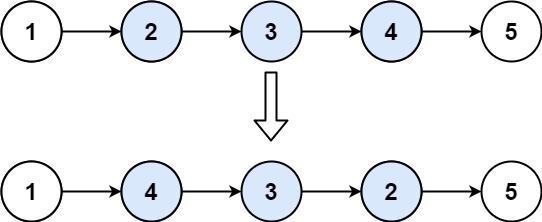

输入：head = [1,2,3,4,5], left = 2, right = 4
输出：[1,4,3,2,5]
示例 2：

输入：head = [5], left = 1, right = 1
输出：[5]
 

提示：

链表中节点数目为 n
1 <= n <= 500
-500 <= Node.val <= 500
1 <= left <= right <= n
 

进阶： 你可以使用一趟扫描完成反转吗？



In [27]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def f92(head, left, right):
    p0 = dummy = ListNode(next=head)
    for _ in range(left - 1):
        p0 = p0.next

    pre = None
    cur = p0.next
    for _ in range(right - left + 1):
        nxt = cur.next
        cur.next = pre
        pre, cur = cur, nxt

    p0.next.next = cur 
    p0.next = pre
    return dummy.next

def list_listnode(vals):
    dummy = cur = ListNode(None)
    for val in vals:
        cur.next = ListNode(val)
        cur = cur.next
    return dummy.next

# 辅助函数：用列表打印链表
def print_listnode(head):
    vals = []
    cur = head
    while cur:
        vals.append(cur.val)
        cur = cur.next
    return vals

head = list_listnode([1,2,3,4,5])
left, right = 2, 4
reversed_head = f92(head, left, right)
print_listnode(reversed_head)




[1, 4, 3, 2, 5]

# 25. K 个一组翻转链表

给你链表的头节点 head ，每 k 个节点一组进行翻转，请你返回修改后的链表。

k 是一个正整数，它的值小于或等于链表的长度。如果节点总数不是 k 的整数倍，那么请将最后剩余的节点保持原有顺序。

你不能只是单纯的改变节点内部的值，而是需要实际进行节点交换。

 

示例 1：

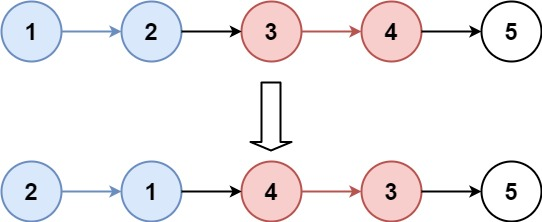

输入：head = [1,2,3,4,5], k = 2
输出：[2,1,4,3,5]
示例 2：

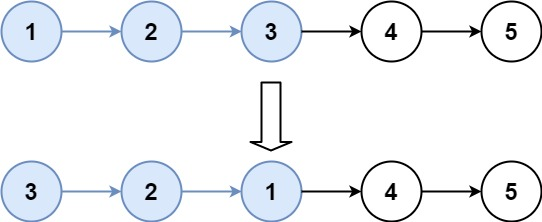


输入：head = [1,2,3,4,5], k = 3
输出：[3,2,1,4,5]
 

提示：
链表中的节点数目为 n
1 <= k <= n <= 5000
0 <= Node.val <= 1000
 

进阶：你可以设计一个只用 O(1) 额外内存空间的算法解决此问题吗？

In [28]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def f25(head, k):
    n = 0 
    cur = head
    while cur:
        n += 1
        cur = cur.next

    p0 = dummy = ListNode(next = head)
    pre = None
    cur = p0.next

    while n>=k:
        n -= k   
        for _ in range(k):
            nxt = cur.next
            cur.next = pre
            pre, cur = cur, nxt
        pnxt = p0.next
        p0.next.next = cur 
        p0.next = pre
        p0 = pnxt
    return dummy.next

def list_listnode(vals):
    dummy = cur = ListNode(0)
    for val in vals:
        cur.next = ListNode(val)
        cur = cur.next
    return dummy.next

def print_listnode(head):
    vals = []
    cur = head
    while cur:
        vals.append(cur.val)
        cur = cur.next
    return vals

k = 2
head = list_listnode([1,2,3,4,5])
reversed_head = f25(head, k)
print_listnode(reversed_head)     

[2, 1, 4, 3, 5]